In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('../results/resnet_train_10_features.csv')

In [3]:
valid = pd.read_csv('../results/resnet_valid_10_features.csv')

In [4]:
train['fname'] = train['fname'].str.split('/').str[1]

In [5]:
valid['fname'] = valid['fname'].str.split('/').str[1]

In [6]:
d_map = {
    'Celiac': 0,
    'EE': 1,
    'Normal': 2
}

In [7]:
train['fname'] = train['fname'].map(d_map)
valid['fname'] = valid['fname'].map(d_map)

In [8]:
import xgboost as xgb

In [9]:
x = xgb.XGBClassifier(objective= 'multi:softmax', num_class=3, max_depth=8)

In [10]:
cols = list(train.columns)

In [11]:
cols.remove('fname')

In [69]:
x.fit(train[cols], train['fname'])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=8, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, num_class=3, objective='multi:softprob',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

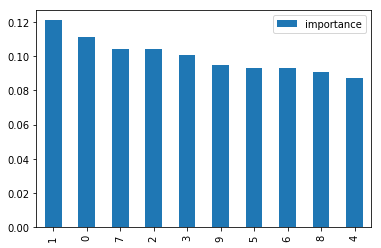

In [70]:
feature_importances = pd.DataFrame(x.feature_importances_,
                                   index = cols,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances.plot(kind='bar')

In [71]:
np.unique(x.predict(valid[cols]))

/apps/software/standard/core/anaconda/5.2.0-py3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array([0, 2])

In [72]:
len(valid)

26569

In [73]:
np.unique(train['fname'])

array([0, 1, 2])

In [12]:
from sklearn import svm

In [13]:


X = np.array(train[cols])
Y = np.array(train['fname'])
clf = svm.SVC(gamma=0.001, decision_function_shape='ovo', verbose=True)
clf.fit(X, Y) 

# dec = clf.decision_function([[1]])
# dec.shape[1] # 4 classes: 4*3/2 = 6
# 6
# >>> clf.decision_function_shape = "ovr"
# >>> dec = clf.decision_function([[1]])
# >>> dec.shape[1] # 4 classes

[LibSVM]

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=True)

In [16]:
preds = clf.predict(valid[cols])

In [17]:
np.unique(preds)

array([0])

In [44]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, max_iter=100000)
kmeans.fit(train[cols])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100000,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [45]:
preds = kmeans.predict(valid[cols])

In [46]:
np.unique(preds)

array([0, 1, 2], dtype=int32)

In [47]:
from sklearn.metrics import confusion_matrix

print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Automatically created module for IPython interactive environment


In [48]:
confusion_matrix(valid['fname'], preds)

array([[5692, 1863, 8676],
       [  14,  650, 1224],
       [  10, 5981, 2459]])

Normalized confusion matrix
[[0.35068696 0.11478036 0.53453268]
 [0.00741525 0.34427966 0.64830508]
 [0.00118343 0.70781065 0.29100592]]


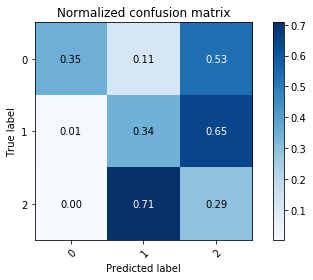

In [49]:
plot_confusion_matrix(valid['fname'], preds, classes=np.array(['0', '1', '2']), normalize=True)